##2. Mean Squared Logarithmic Error Loss
Suppose we want to reduce the difference between the actual and predicted variable we can take the natural logarithm of the predicted variable then take the mean squared error.

This will overcome the problem possessed by the Mean Square Error Method. The model will now penalize less in comparison to the earlier method.

In [6]:
from sklearn.datasets import make_regression #used to create regression sample dataset
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot

In [7]:
# generate regression dataset
X, y = make_regression(n_samples=5000, n_features=20, noise=0.1, random_state=1)
# standardize dataset
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:, 0]
# Spilt into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

In [11]:
#define model
model1 = Sequential()
model1.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model1.add(Dense(1, activation='linear'))
opt = SGD(lr=0.1, momentum=0.9)
model1.compile(loss='mean_squared_error', optimizer=opt)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [14]:
#fit model
history = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=2)

Epoch 1/50
118/118 [==============================] - 0s 3ms/step - loss: 8.0376e-07 - val_loss: 3.4145e-07
Epoch 2/50
118/118 [==============================] - 0s 2ms/step - loss: 4.9932e-07 - val_loss: 4.9934e-07
Epoch 3/50
118/118 [==============================] - 0s 2ms/step - loss: 7.4571e-07 - val_loss: 5.1537e-07
Epoch 4/50
118/118 [==============================] - 0s 2ms/step - loss: 7.8269e-07 - val_loss: 5.3553e-07
Epoch 5/50
118/118 [==============================] - 0s 2ms/step - loss: 5.6694e-07 - val_loss: 6.2661e-07
Epoch 6/50
118/118 [==============================] - 0s 2ms/step - loss: 6.6783e-07 - val_loss: 9.0951e-07
Epoch 7/50
118/118 [==============================] - 0s 2ms/step - loss: 5.9683e-07 - val_loss: 6.4971e-07
Epoch 8/50
118/118 [==============================] - 0s 2ms/step - loss: 5.5552e-07 - val_loss: 1.7998e-06
Epoch 9/50
118/118 [==============================] - 0s 2ms/step - loss: 7.2824e-07 - val_loss: 6.0339e-07
Epoch 10/50
118/118 [=======

In [17]:
# evaluate the model
train_mse = model1.evaluate(X_train, y_train, verbose=0)
test_mse = model1.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 0.000, Test: 0.000


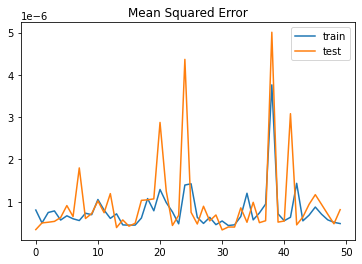

In [18]:
#plot loss during training
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()